# AI Community @ Семинар № 4
## Классификаторы на решающих деревьях

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1337)

### Дерево
Почитать: http://scikit-learn.org/stable/modules/tree.html

In [3]:
from sklearn.tree import DecisionTreeClassifier

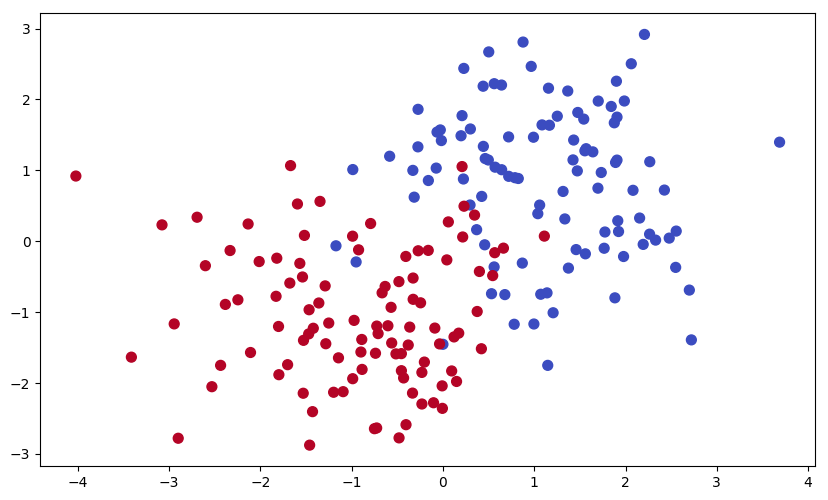

In [4]:
data_x = np.vstack((np.random.normal(loc=1, size=(100, 2)), # concatenate row-wise
                    np.random.normal(loc=-1, size=(100, 2))))
data_y = np.array([0] * 100 + [1] * 100)

plt.figure(figsize=(10.0, 6.0), dpi=100)
_ = plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=50, cmap=plt.cm.coolwarm)

In [5]:
def plot_model(X, y, clf, proba=False):
    """Fits the classifier on the data (X, y) and plots the result on a 2-D plane."""
    def get_grid(data):
        x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
        y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
        return np.meshgrid(np.arange(x_min, x_max, 0.01),
                           np.arange(y_min, y_max, 0.01))
    
    clf.fit(X, y)
    xx, yy = get_grid(X)
    if proba:
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
    plt.pcolormesh(xx, yy, predicted, cmap=plt.cm.coolwarm, alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap=plt.cm.coolwarm, alpha=0.95)
    plt.ylim([yy.min(),yy.max()])
    plt.xlim([xx.min(),xx.max()])
    
    return clf

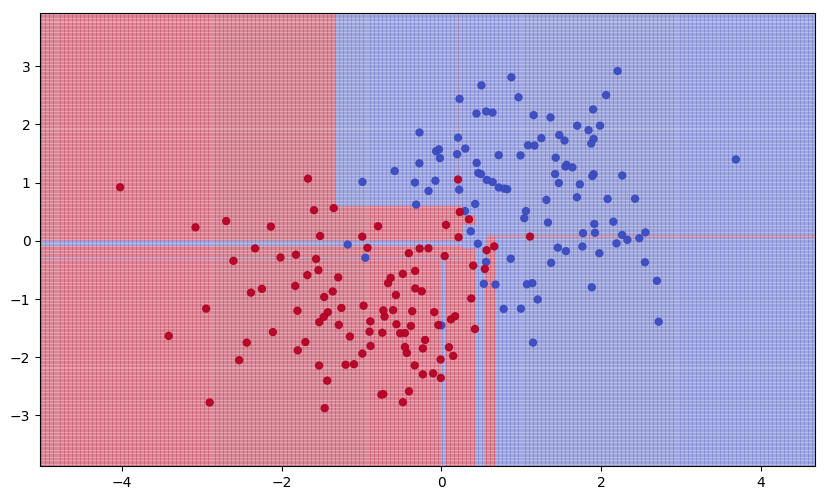

In [6]:
plt.figure(figsize=(10.0, 6.0), dpi=100)
_ = plot_model(data_x, data_y, DecisionTreeClassifier(), proba=True)

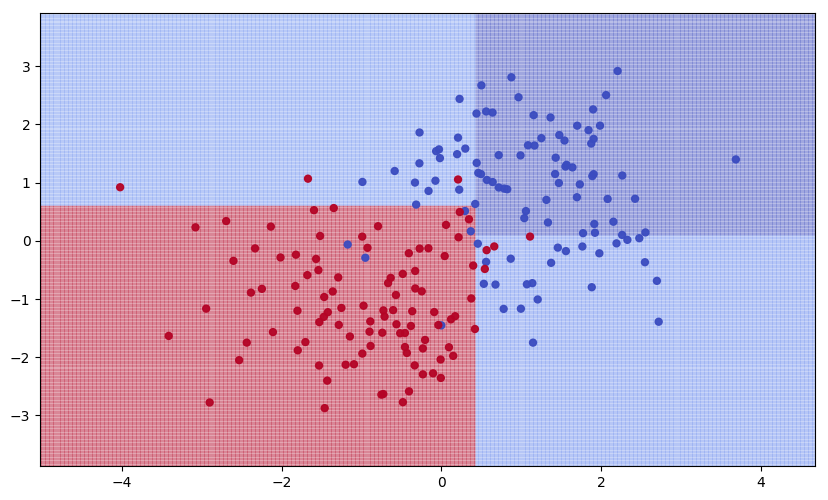

In [7]:
plt.figure(figsize=(10.0, 6.0), dpi=100)
_ = plot_model(data_x, data_y, DecisionTreeClassifier(max_depth=2), proba=True)

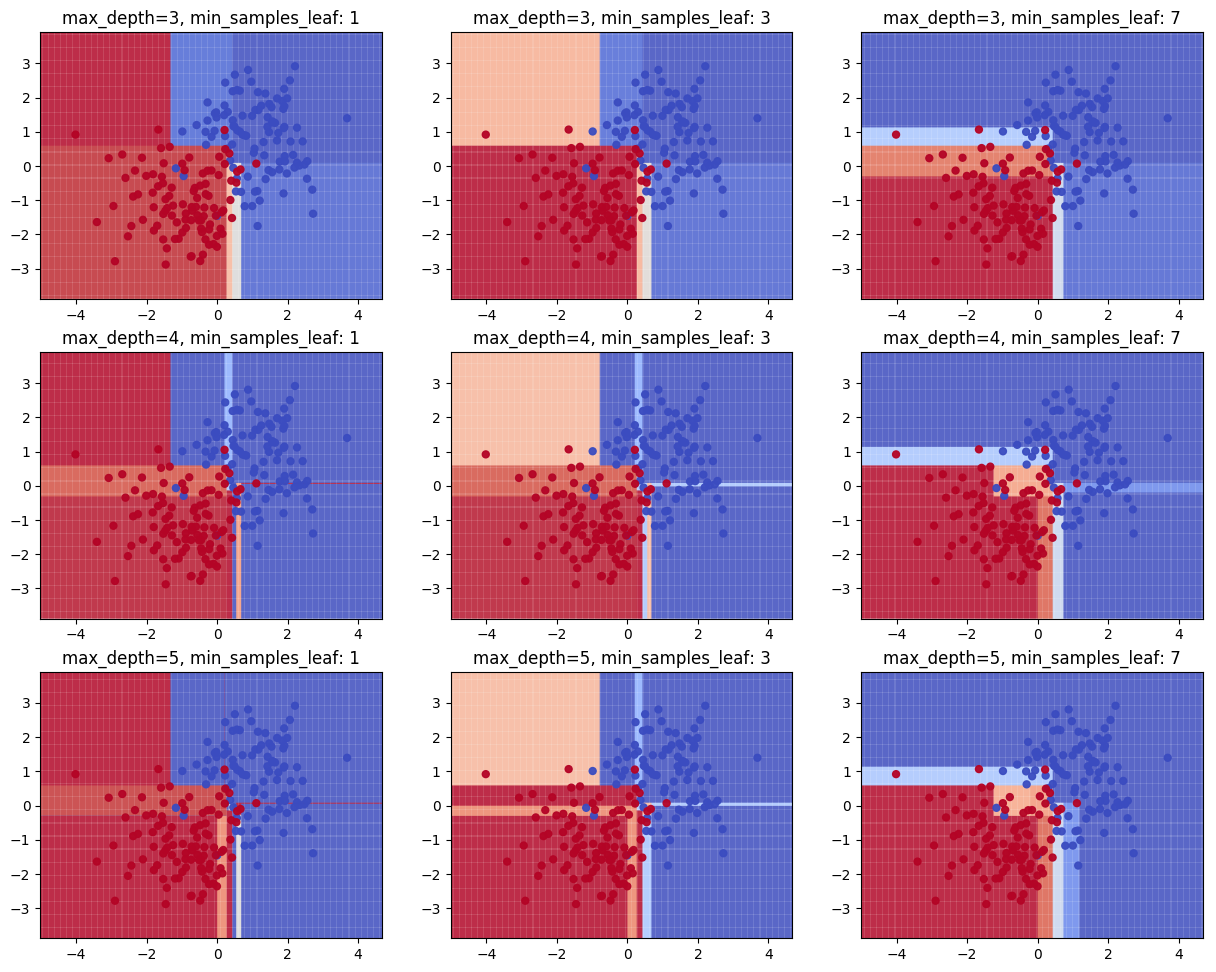

In [8]:
plt.figure(figsize=(15.0, 12.0), dpi=100)
for i, max_depth in enumerate([3, 4, 5]):
    for j, min_samples_leaf in enumerate([1, 3, 7]):
        plt.subplot2grid((3, 3), (i, j))
        plot_model(data_x, data_y, DecisionTreeClassifier(max_depth=max_depth,
                                                          min_samples_leaf=min_samples_leaf), proba=True)
        plt.title('max_depth=' + str(max_depth) + ', min_samples_leaf: ' + str(min_samples_leaf))

### Леса

Лесами называются ансамбли одиночных решающих деревьев. Сам же ансамбль — набор алгоритмов, ответы которых затем аггрегируются.

В Scikit-Learn реализовано несколько ансамблей на решающих деревьях:

* Случайные: Random Forest, Extra Trees

* Бустинговые: AdaBoost, GradientBoosting

#### Random Forest
Каждое дерево обучается на независимой подвыборке из обучающей выборки (Bagging).  
Для ветвления используется подвыборка признаков (Random Subspace).

#### Extra Trees
Аналог Random Forest, в котором дополнительно при ветвлении порог для каждого признака выбирается случайно, а не наилучшим образом.

##### Параметры для настройки:
* `criterion` — функция для вычисления качества ветвления (критерий информативности).  
  * Классификация:
    * `'gini'` — Gini impurity (для двух классов: $I_G(p) = 2p(1 - p), p\ — \text{доля элементов одного из классов}$)
    * `'entropy'` — энтропия ($I_E(p) = -p \log p - (1 - p) \log (1 - p)$).  
  * Регрессия:
    * `'mse'` — средняя квадратичная ошибка (Mean Squared Error)
    * `'mae'` — средняя абсолютная ошибка (Mean Absolute Error).

* `max_depth` — максимальная глубина дерева. Если лист находится на данной глубине — он не делится.  
Не ограничена по умолчанию (тогда лист прекращает делиться при наличии в нем меньше чем `'min_samples_split'` элементов).

* `min_samples_split` — минимальное количество элементов во внутренней вершине для ветвления.

* `min_samples_leaf` — минимальное количество элементов, допустимое в листе. 

* `class_weight` — веса классов, по умолчанию считаются одинаковыми. Их можно указать явно или передать параметры:  
  * `'balanced'` — перед обучением веса классов измеряются на всей обучающей выборке.
  * `'balanced_subsample'` — измеряются на обучающей подвыборке для каждого дерева.

##### Полезности
* `feature_importances_` — список важностей для признаков. Признак более важен, если он чаще был выбран для совершения ветвления.

* `oob_score=True` в конструкторе — лес подсчитывает out-of-bag score — при обучении каждого дерева оценивается его качество на объектах вне подвыборки этого дерева.  
Таким образом можно оценить качество классификации без кросс-валидации или отложенной выборки.

_Почитать_: http://scikit-learn.org/stable/modules/ensemble.html

In [9]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier

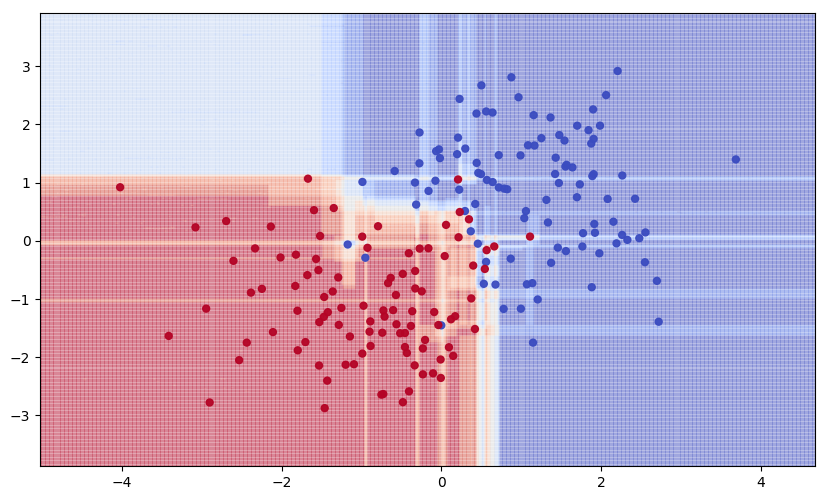

In [10]:
plt.figure(figsize=(10.0, 6.0), dpi=100)
clf = plot_model(data_x, data_y, RandomForestClassifier(n_estimators=10, n_jobs=-1), proba=True) # n_jobs=-1 позволяет использовать все ядра процессора

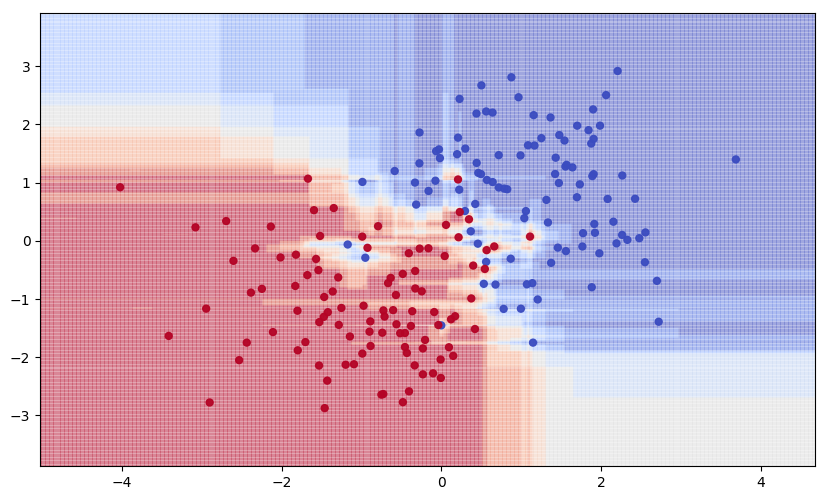

In [11]:
plt.figure(figsize=(10.0, 6.0), dpi=100)
_ = plot_model(data_x, data_y, ExtraTreesClassifier(n_jobs=-1), proba=True)

In [12]:
def plot_forest_parameters(Forest):
    plt.figure(figsize=(15.0, 12.0), dpi=100)
    for i, max_depth in enumerate([2, 3, None]):
        for j, n_estimators in enumerate([1, 5, 50]):
            plt.subplot2grid((3, 3), (i, j))
            plot_model(data_x, data_y, Forest(max_depth=max_depth,
                                              n_estimators=n_estimators), proba=True)
            plt.title('max_depth=' + str(max_depth) + ', n_estimators: ' + str(n_estimators))

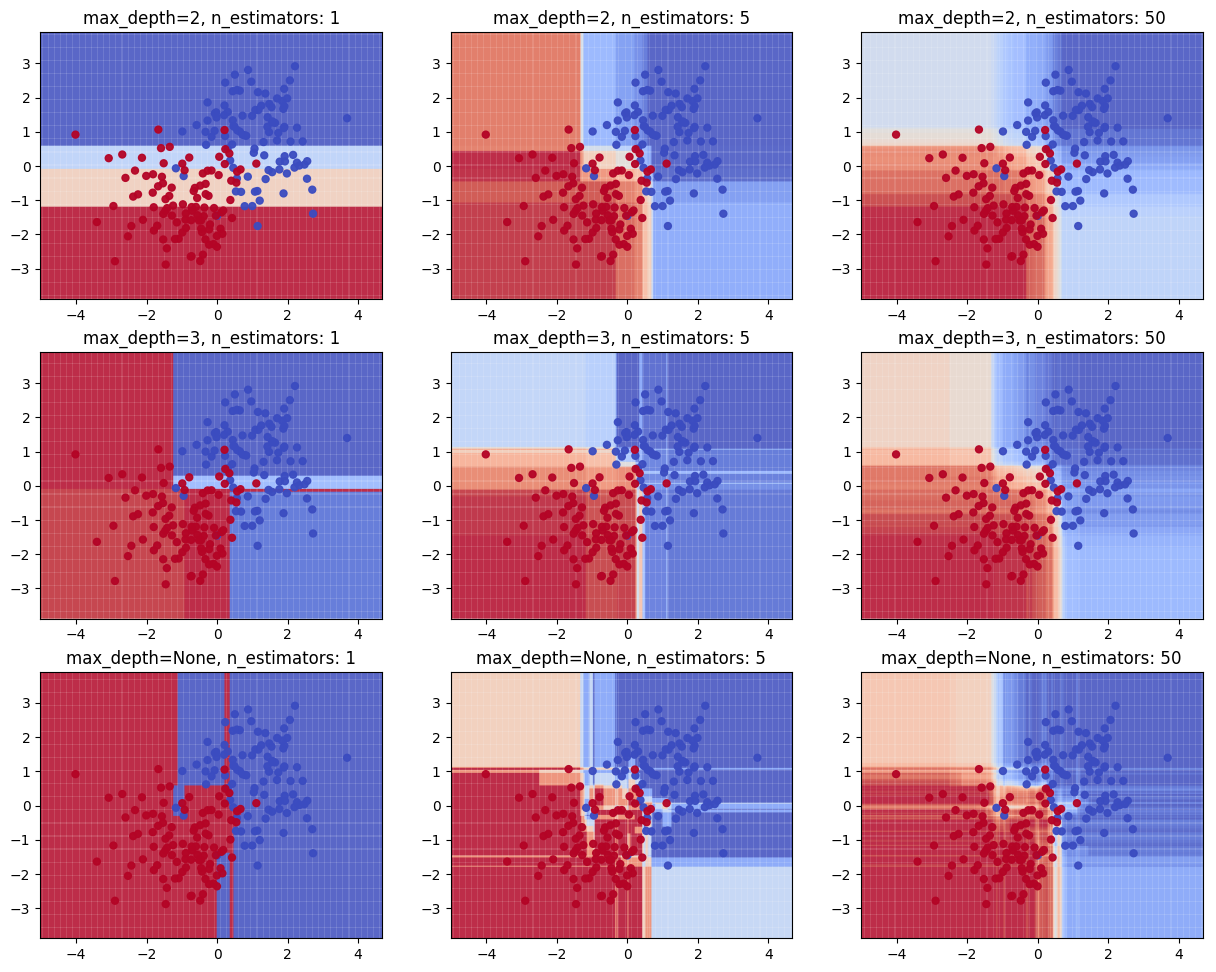

In [13]:
plot_forest_parameters(RandomForestClassifier)

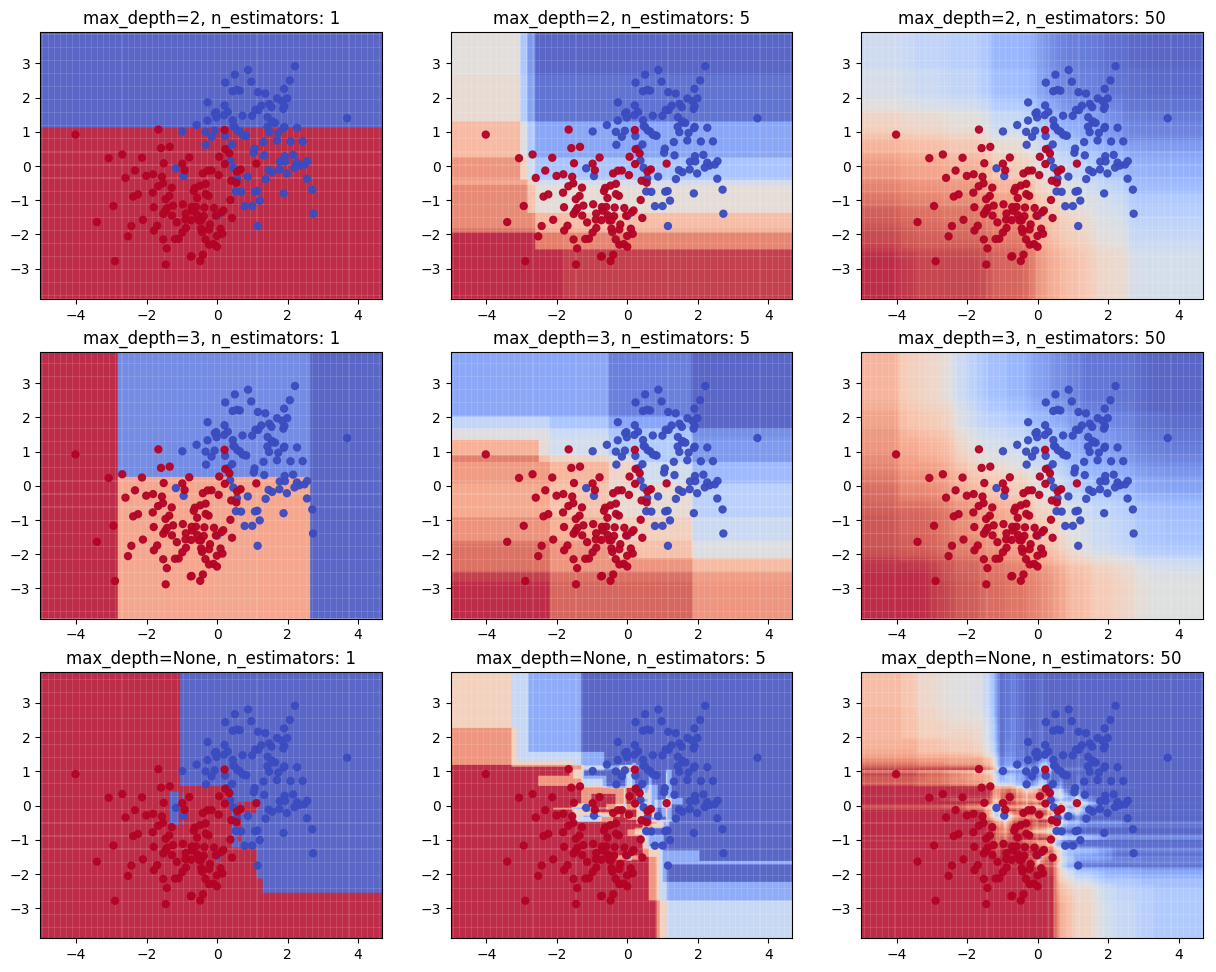

In [14]:
plot_forest_parameters(ExtraTreesClassifier)

#### AdaBoost

Ансамбль из алгоритмов (не обязательно деревьев, нужный классификатор можно передать в параметре  `base_estimator`), который строится поочередно.  
Каждый следующий классификатор уделяет больше внимания тем объектам, которые были ошибочно оцененены предыдущими.

##### Параметры:

* `learning_rate` — уменьшает вклад каждого следующего классификатора

* `base_estimator` — базовый алгоритм ансамбля, можно передать любой классификатор \ регрессор из Scikit-Learn, поддерживающий изменение весов для объектов обучающей выборки

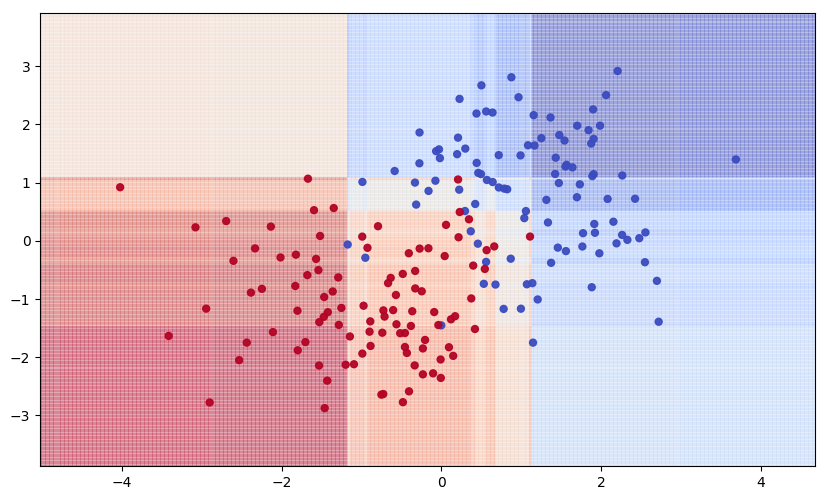

In [15]:
plt.figure(figsize=(10.0, 6.0), dpi=100)
_ = plot_model(data_x, data_y, AdaBoostClassifier(), proba=True)

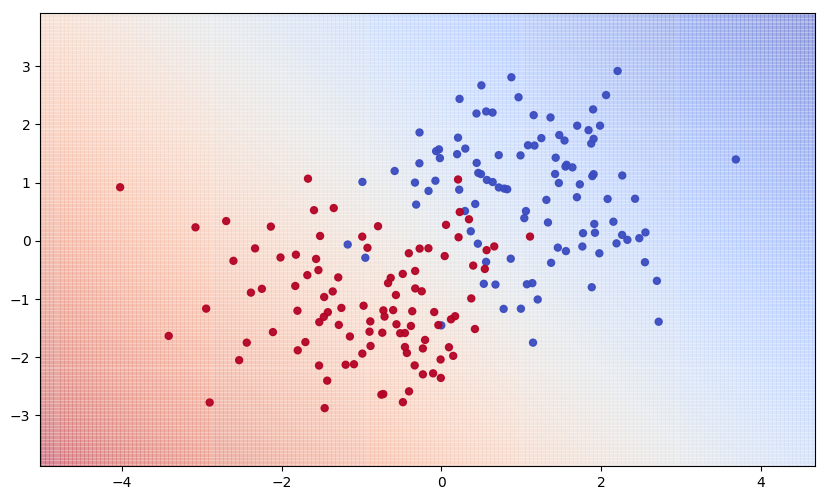

In [16]:
from sklearn.linear_model import LogisticRegression

plt.figure(figsize=(10.0, 6.0), dpi=100)
_ = plot_model(data_x, data_y, AdaBoostClassifier(base_estimator=LogisticRegression()), proba=True)

#### xgBoost

Библиотека для градиентного бустинга, показывающая наилучшие результаты во многих задачах.

##### Важные параметры:

* `objective` — целевая функция, которую оптимизируется алгоритмом. Зависит от решаемой задачи, можно передать свою.  
Примеры: `'reg:linear'`,  `'reg:logistic'` ,`'binary:logistic'`, `'binary:logitraw'`, `'multi:softmax'`, `'rank:pairwise'`.

* `reg_alpha`, `reg_lambda` — параметры для $L_1$ и $L_2$ регуляризации, их повышение помогает с переобучением.

* `subsample`, `colsample_bytree`, `colsample_bylevel` — сэмплирование по объектам и признакам

* `min_child_weight` — минимальная сумма весов в листе

_Почитать_: https://medium.com/towards-data-science/boosting-algorithm-xgboost-4d9ec0207d

In [19]:
import xgboost as xgb

OSError: [WinError 126] The specified module could not be found

In [ ]:
plt.figure(figsize=(10.0, 6.0), dpi=100)
_ = plot_model(data_x, data_y, xgb.XGBClassifier(max_depth=2), proba=True)

##### Настраиваем XGBoost

Выбираем относительно большую learning_rate $(η∈[0.05, 0.3]$, подбираем оптимальное число деревьев для выбранного $η$.  
Настраиваем параметры деревьев, начиная с самых значимых (`max_depth`, `min_child_weight`, `gamma`, `subsample`, `colsample_bytree`)

Настраиваем регуляризации $(λ, α)$

Уменьшаем learning_rate, пропорционально увеличиваем число деревьев